In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls drive/MyDrive/PUI_project_Fall_2021/All_Data/EPA_Download/

Data_Caveats.csv
Data_Dictionary.csv
Data_Dictionary.gsheet
emission_filtered_EPA_quarterly.csv
Emissions_Filtered_EPA_Air_Markets_Program_Data.csv
Emissions_Filtered_EPA_cleaned.csv
epa_emission_monthly.csv


In [5]:
emissions_monthly = pd.read_csv("drive/MyDrive/PUI_project_Fall_2021/All_Data/EPA_Download/epa_emission_monthly.csv",index_col=None)

columns = emissions_monthly.columns
columns = [x.strip() for x in columns]
columns

['State',
 'Facility Name',
 'Owner Name',
 'Facility ID (ORISPL)',
 'Month',
 'Year',
 'SO2 (tons)',
 'NOx (tons)',
 'CO2 (short tons)',
 'Heat Input (MMBtu)',
 'Gross Load (MW-h)']

In [6]:
emissions_monthly.set_axis(columns,axis=1,inplace=True)

In [7]:
emissions_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240327 entries, 0 to 240326
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   State                 240327 non-null  object 
 1   Facility Name         240327 non-null  object 
 2   Owner Name            240327 non-null  object 
 3   Facility ID (ORISPL)  240327 non-null  int64  
 4   Month                 240327 non-null  int64  
 5   Year                  240327 non-null  int64  
 6   SO2 (tons)            205780 non-null  float64
 7   NOx (tons)            209839 non-null  float64
 8   CO2 (short tons)      201274 non-null  float64
 9   Heat Input (MMBtu)    210107 non-null  float64
 10  Gross Load (MW-h)     203330 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 20.2+ MB


In [8]:
emissions_monthly['period'] = emissions_monthly['Year'].astype(str) + "-"+ emissions_monthly['Month'].astype(str)  
emissions_monthly.period = pd.to_datetime(emissions_monthly.period)
emissions_monthly

,State,Facility Name,Owner Name,Facility ID (ORISPL),Month,Year,SO2 (tons),NOx (tons),CO2 (short tons),Heat Input (MMBtu),Gross Load (MW-h),period
0,AL,AMEA Sylacauga Plant,Alabama Municipal Electric Authority,56018,1,2005,0.000,0.044,67.8,1148.5,102.0,2005-01-01
1,AL,AMEA Sylacauga Plant,Alabama Municipal Electric Authority,56018,2,2005,NaN,NaN,NaN,NaN,NaN,2005-02-01
2,AL,AMEA Sylacauga Plant,Alabama Municipal Electric Authority,56018,3,2005,0.001,0.065,101.6,1722.7,153.0,2005-03-01
3,AL,AMEA Sylacauga Plant,Alabama Municipal Electric Authority,56018,4,2005,NaN,NaN,NaN,NaN,NaN,2005-04-01
4,AL,AMEA Sylacauga Plant,Alabama Municipal Electric Authority,56018,5,2005,0.001,0.161,219.0,3710.9,378.0,2005-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
240322,WY,Wyodak,"Black Hills Corporation, Pacificorp Energy Gen...",6101,8,2016,233.875,347.809,321484.0,3065249.8,279246.0,2016-08-01
240323,WY,Wyodak,"Black Hills Corporation, Pacificorp Energy Gen...",6101,9,2016,228.710,334.644,309080.6,2946991.1,267691.0,2016-09-01
240324,WY,Wyodak,"Black Hills Corporation, Pacificorp Energy Gen...",6101,10,2016,211.495,314.882,290879.0,2773451.5,253110.0,2016-10-01
240325,WY,Wyodak,"Black Hills Corporation, Pacificorp Energy Gen...",6101,11,2016,207.293,306.374,283543.1,2703507.4,249476.0,2016-11-01


In [9]:
emissions_owner = emissions_monthly[['Owner Name','period','CO2 (short tons)',	'Heat Input (MMBtu)','Year',	'Month','Gross Load (MW-h)']].groupby(by = ['Owner Name','period','Year',	'Month'],as_index=False).sum()

In [10]:
emissions_owner = emissions_owner[['CO2 (short tons)','Owner Name','Gross Load (MW-h)']].groupby(by = ['Owner Name'],as_index = False).sum() # For the sake of time series testing, I have kept only 1 top pollutor, will change later
emissions_owner

,Owner Name,CO2 (short tons),Gross Load (MW-h)
0,"AEE 2, LLC",3.119667e+06,0.000000e+00
1,"AEE 2, LLC, AES Corporation",5.135959e+06,5.176134e+06
2,AES Corporation,1.916156e+08,2.666913e+08
3,"AES Corporation, Indianapolis Power & Light Co...",1.870400e+08,1.854496e+08
4,"AES Puerto Rico, LP",0.000000e+00,1.658494e+06
...,...,...,...
734,"Wolf Hollow II Power, LLC",1.006411e+07,2.559044e+07
735,"Wolverine Power Supply Cooperative, Inc.",2.212325e+06,3.336925e+06
736,"Wrightsville Power Facility, LLC",2.905817e+06,6.392331e+06
737,Wyandotte Municipal Services,3.868888e+06,0.000000e+00


In [61]:
emissions_month_level_CO2 = emissions_monthly[['CO2 (short tons)','period']].groupby(by = ['period'],as_index = True).sum()
emissions_month_level_load = emissions_monthly[['Gross Load (MW-h)','period']].groupby(by = ['period'],as_index = True).sum()

emissions_month_level_CO2.head(2)

,CO2 (short tons)
period,
2005-01-01,2.112770e+08
2005-02-01,1.820985e+08


In [12]:
emissions_month_level_CO2.sort_index(inplace=True)

In [13]:
emissions_month_level_CO2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201 entries, 2005-01-01 to 2021-09-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO2 (short tons)  201 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6cb076a8d0>],
      dtype=object)

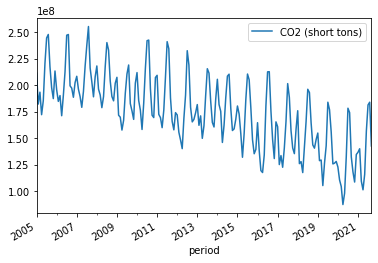

In [14]:
train_CO2 = emissions_month_level_CO2
train_CO2.plot(subplots=True)

In [15]:
future_years = pd.read_csv("drive/MyDrive/PUI_project_Fall_2021/All_Data/predict_dates.csv")
future_years.period = pd.to_datetime(future_years.period)
future_years
test = future_years[(future_years['period'] < '2026-01-01') & (future_years['period'] > '2021-09-01')]

In [16]:
test.set_index('period',inplace=True)
test.head()

""
period
2021-10-01
2021-11-01
2021-12-01
2022-01-01
2022-02-01


In [17]:
! pip install pmdarima

     |████████████████████████████████| 1.4 MB 8.3 MB/s 
     |████████████████████████████████| 9.8 MB 23.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [18]:
from pmdarima.arima import auto_arima

In [19]:
arima_model_co2 =  auto_arima(train_CO2,start_p=0, d=None, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=2, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6740.335, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6727.423, Time=0.62 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=6716.049, Time=0.57 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6758.938, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=6718.619, Time=0.09 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=6717.931, Time=0.40 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=6716.914, Time=1.55 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=6715.961, Time=0.38 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=6717.088, Time=1.65 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=6718.790, Time=2.82 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=6741.713, Time=1.05 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=6727.238, Time=1.76 sec
 ARIMA(0,0,2)(1,1,0)[12] intercept   : AIC=6711.637, Time=0.68 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=6718.184, Time=0.37 sec
 ARIMA(0,0,2)(2,1,0

In [59]:
prediction_CO2 = pd.DataFrame(arima_model_co2.predict(n_periods = 51),index=test.index)
prediction_CO2.columns = ['predicted_emissions']
prediction_CO2.head(2)

,predicted_emissions
period,
2021-10-01,1.187921e+08
2021-11-01,1.073102e+08


In [21]:
emissions_month_level_CO2["year"] = pd.DatetimeIndex(emissions_month_level_CO2.index).year

emissions_month_level_CO2.year = "01-01-" + emissions_month_level_CO2.year.astype(str) 
emissions_month_level_CO2.year = pd.DatetimeIndex(emissions_month_level_CO2.year.astype(str))
emissions_month_level_CO2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201 entries, 2005-01-01 to 2021-09-01
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CO2 (short tons)  201 non-null    float64       
 1   year              201 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [57]:
emissions_month_level_CO2_yrly_sum = emissions_month_level_CO2[['CO2 (short tons)','year']].groupby(by = 'year').sum()
emissions_month_level_CO2_yrly_sum.head(2)

,CO2 (short tons)
year,
2005-01-01,2.472055e+09
2006-01-01,2.426609e+09


In [23]:
prediction_CO2["year"] = pd.DatetimeIndex(prediction_CO2.index).year

prediction_CO2.year = "01-01-" + prediction_CO2.year.astype(str) 
prediction_CO2.year = pd.DatetimeIndex(prediction_CO2.year.astype(str))


In [24]:
prediction_CO2_yrly_sum = prediction_CO2[['predicted_emissions','year']].groupby(by = 'year').sum()
prediction_CO2_yrly_sum.head()

,predicted_emissions
year,
2021-01-01,3.565556e+08
2022-01-01,1.571973e+09
2023-01-01,1.531869e+09
2024-01-01,1.491014e+09
2025-01-01,1.450208e+09


In [25]:
test_mv = prediction_CO2_yrly_sum[0:1]['predicted_emissions'].item() + emissions_month_level_CO2_yrly_sum[-1:]['CO2 (short tons)'].item()
test_mv

1623526690.8979928

In [26]:
prediction_CO2_yrly_sum[0:1]['predicted_emissions'] = test_mv
prediction_CO2_yrly_sum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,predicted_emissions
year,
2021-01-01,1.623527e+09
2022-01-01,1.571973e+09
2023-01-01,1.531869e+09
2024-01-01,1.491014e+09
2025-01-01,1.450208e+09


In [27]:
emissions_month_level_CO2_yrly_sum[-1:]['CO2 (short tons)'] = test_mv
emissions_month_level_CO2_yrly_sum[-1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CO2 (short tons)
year,
2021-01-01,1.623527e+09


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c93c417d0>],
      dtype=object)

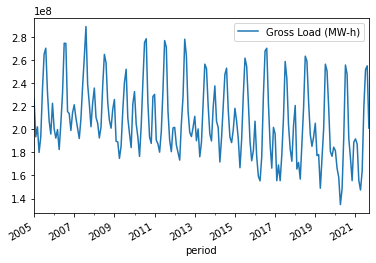

In [28]:
#for predicting gross load requirements

emissions_month_level_load.plot(subplots=True)

In [29]:
train_load = emissions_month_level_load

In [30]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(train_load)

(0.01, False)

In [31]:
arima_model_load =  auto_arima(train_load,start_p=0, d=None, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=2, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6733.071, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6731.591, Time=0.84 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=6725.313, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6734.825, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=6727.046, Time=0.19 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=6726.237, Time=1.82 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=6725.197, Time=1.43 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=6727.085, Time=2.37 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=6733.232, Time=0.91 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=6734.153, Time=2.80 sec
 ARIMA(0,0,2)(0,1,2)[12] intercept   : AIC=6727.797, Time=2.02 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=6731.946, Time=1.46 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=6734.842, Time=3.52 sec
 ARIMA(0,0,1)(0,1,2)[12]             : AIC=6725.848, Time=1.26 sec

Best model:  ARIMA

In [56]:
prediction_load = pd.DataFrame(arima_model_load.predict(n_periods = 51),index=test.index)
prediction_load.columns = ['predicted_load']
prediction_load.head(2)

,predicted_load
period,
2021-10-01,1.749870e+08
2021-11-01,1.546715e+08


In [33]:
emissions_month_level_load["year"] = pd.DatetimeIndex(emissions_month_level_load.index).year

emissions_month_level_load.year = "01-01-" + emissions_month_level_load.year.astype(str) 
emissions_month_level_load.year = pd.DatetimeIndex(emissions_month_level_load.year.astype(str))
emissions_month_level_load.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201 entries, 2005-01-01 to 2021-09-01
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Gross Load (MW-h)  201 non-null    float64       
 1   year               201 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [55]:
emissions_month_level_load_yrly_sum = emissions_month_level_load[['Gross Load (MW-h)','year']].groupby(by = 'year').sum()
emissions_month_level_load_yrly_sum.head(2)

,Gross Load (MW-h)
year,
2005-01-01,2.624275e+09
2006-01-01,2.604200e+09


In [35]:
prediction_load["year"] = pd.DatetimeIndex(prediction_load.index).year

prediction_load.year = "01-01-" + prediction_load.year.astype(str) 
prediction_load.year = pd.DatetimeIndex(prediction_load.year.astype(str))


In [36]:
prediction_load_yrly_sum = prediction_load[['predicted_load','year']].groupby(by = 'year').sum()
prediction_load_yrly_sum.head()

,predicted_load
year,
2021-01-01,5.168407e+08
2022-01-01,2.267222e+09
2023-01-01,2.254280e+09
2024-01-01,2.238543e+09
2025-01-01,2.222805e+09


In [37]:
load_2021 = prediction_load_yrly_sum[0:1]['predicted_load'].item() + emissions_month_level_load_yrly_sum[-1:]['Gross Load (MW-h)'].item()

prediction_load_yrly_sum[0:1]['predicted_load'] = load_2021
prediction_load_yrly_sum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,predicted_load
year,
2021-01-01,2.290252e+09
2022-01-01,2.267222e+09
2023-01-01,2.254280e+09
2024-01-01,2.238543e+09
2025-01-01,2.222805e+09


In [38]:
emissions_month_level_load_yrly_sum[-1:]['Gross Load (MW-h)'] = load_2021
emissions_month_level_load_yrly_sum[-1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Gross Load (MW-h)
year,
2021-01-01,2.290252e+09


In [39]:
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
from matplotlib.pyplot import text
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [40]:
# plotting for different scenarios

scenarios = pd.read_csv("drive/MyDrive/PUI_project_Fall_2021/All_Data/Emission_scenario.csv",index_col=None)
scenarios


,scenario,emissions in mWh
0,All_naturalGas,3.278737e+08
1,Coal_naturalGas,5.656721e+08
2,Coal_petroleum,7.854556e+08
3,Coal_renewable,4.017353e+08


In [41]:
prediction_CO2_2025_scenario = prediction_CO2_yrly_sum.copy()

In [42]:
prediction_CO2_2025_scenario

,predicted_emissions
year,
2021-01-01,1.623527e+09
2022-01-01,1.571973e+09
2023-01-01,1.531869e+09
2024-01-01,1.491014e+09
2025-01-01,1.450208e+09


In [43]:
prediction_CO2_2025_scenario = prediction_CO2_2025_scenario[0:5:4]

In [44]:
prediction_CO2_2025_scenario

,predicted_emissions
year,
2021-01-01,1.623527e+09
2025-01-01,1.450208e+09


In [45]:
prediction_CO2_2025_scenario = prediction_CO2_2025_scenario.rename(columns = {"predicted_emissions" : "Business" })

In [46]:
prediction_CO2_2025_scenario

,Business
year,
2021-01-01,1.623527e+09
2025-01-01,1.450208e+09


In [47]:
prediction_CO2_2025_scenario["all renewable"] = 0
prediction_CO2_2025_scenario["all renewable"][-1:] = (prediction_CO2_2025_scenario["Business"][-1:].item())*0.6
prediction_CO2_2025_scenario["all renewable"][0:1] = prediction_CO2_2025_scenario["Business"][0:1].item()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
# all natural gas

prediction_CO2_2025_scenario["all natural"] = 0
prediction_CO2_2025_scenario["all natural"][-1:] = (prediction_CO2_2025_scenario["Business"][-1:].item())*0.6 + scenarios['emissions in mWh'][0:1].item()
prediction_CO2_2025_scenario["all natural"][0:1] = prediction_CO2_2025_scenario["Business"][0:1].item()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [49]:
scenarios['emissions in mWh'][1:2]

1    5.656721e+08
Name: emissions in mWh, dtype: float64

In [50]:
# 50% natural gas

prediction_CO2_2025_scenario["50% natural"] = 0
prediction_CO2_2025_scenario["50% natural"][-1:] = (prediction_CO2_2025_scenario["Business"][-1:].item())*0.6 + scenarios['emissions in mWh'][1:2].item()
prediction_CO2_2025_scenario["50% natural"][0:1] = prediction_CO2_2025_scenario["Business"][0:1].item()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [51]:
prediction_CO2_2025_scenario

,Business,all renewable,all natural,50% natural
year,,,,
2021-01-01,1.623527e+09,1.623527e+09,1.623527e+09,1.623527e+09
2025-01-01,1.450208e+09,8.701248e+08,1.197998e+09,1.435797e+09


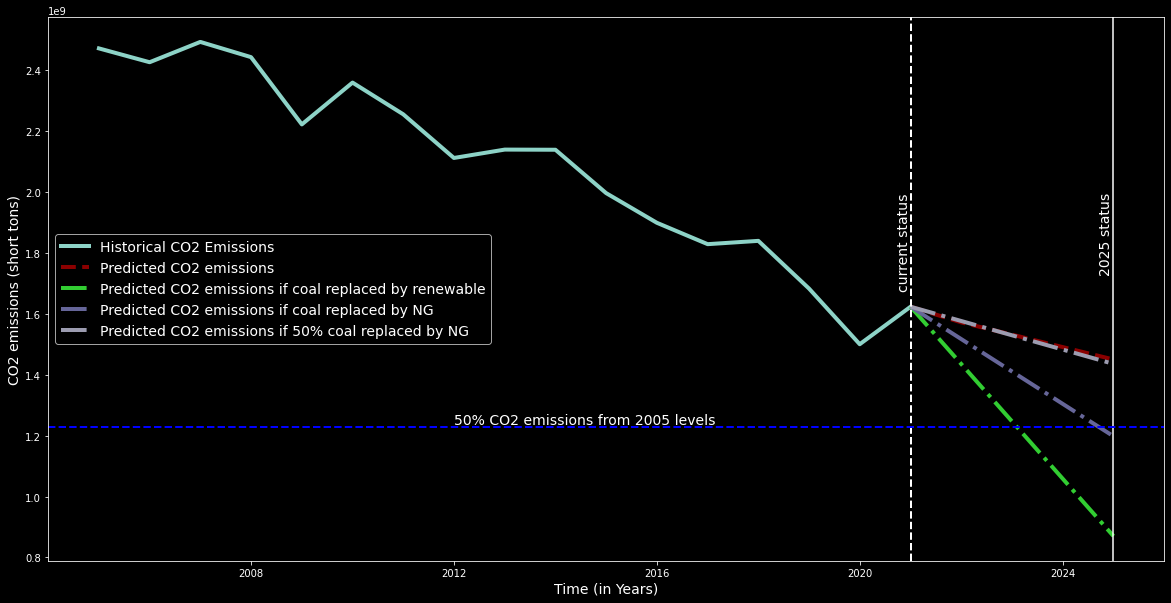

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize=(20,10))
# fig,ax = plt.subplots(figsize=(20,10))
# ax2=ax.twinx()
plt.plot(emissions_month_level_CO2_yrly_sum.index, emissions_month_level_CO2_yrly_sum['CO2 (short tons)'],label = 'Historical CO2 Emissions',lw=4)
plt.plot(prediction_CO2_yrly_sum.index, prediction_CO2_yrly_sum['predicted_emissions'],label = 'Predicted CO2 emissions',color = 'darkred',ls = '--',lw=4)

# for gross load
# ax2.plot(emissions_month_level_load_yrly_sum.index, emissions_month_level_load_yrly_sum['Gross Load (MW-h)'],label = 'Historical Gross Load production',color = 'rosybrown')
# ax2.plot(prediction_load_yrly_sum.index, prediction_load_yrly_sum['predicted_load'],label = 'Predicted Gross Load production')

# For complete renewable transfer
plt.plot(prediction_CO2_2025_scenario.index, prediction_CO2_2025_scenario['all renewable'],label = 'Predicted CO2 emissions if coal replaced by renewable',color = '#32CD32',ls = '-.',lw=4)

# For complete transfer to natural

plt.plot(prediction_CO2_2025_scenario.index, prediction_CO2_2025_scenario['all natural'],label = 'Predicted CO2 emissions if coal replaced by NG',color = '#666699',ls = '-.',lw=4)

# for partial transfer to natural

plt.plot(prediction_CO2_2025_scenario.index, prediction_CO2_2025_scenario['50% natural'],label = 'Predicted CO2 emissions if 50% coal replaced by NG',color = '#9c9cb0',ls = '-.',lw=4)


plt.xlabel("Time (in Years)",fontsize=14)
plt.ylabel("CO2 emissions (short tons)",fontsize=14)
# ax2.set_ylabel("Gross Load (MW-h)",fontsize=14)


plt.legend(loc = 'center left',fontsize=14)
# ax.legend(bbox_to_anchor=(1,1))
# ax2.legend(fontsize=10)

plt.axvline(pd.to_datetime('2021-01-01'),color='white', linestyle='--', lw=2)
text(pd.to_datetime('2021-01-01'),2000000000,s = "current status", rotation=90, verticalalignment='top',horizontalalignment = 'right',fontsize=14)
plt.axvline(pd.to_datetime('2025-01-01'))
text(pd.to_datetime('2025-01-01'),2000000000,s = "2025 status", rotation=90, verticalalignment='top',horizontalalignment = 'right',fontsize=14)
plt.axhline(1228130000,color='blue',linestyle='--', lw=2)
text(pd.to_datetime('2012-01-01'),1230000000,s = "50% CO2 emissions from 2005 levels", rotation=0, verticalalignment='bottom',fontsize=14)

plt.show()
plt.savefig('emission_prediction.png')
